In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full_dataset = pd.read_csv("Crimes_-_2001_to_present.csv")
full_dataset.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [3]:
full_dataset.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
full_dataset.shape

(6662357, 22)

In [5]:
keep_columns = ['ID','Date','IUCR','Primary Type','Description','Arrest','Domestic','Year']
dataset = full_dataset[keep_columns]
dataset.head()

,ID,Date,IUCR,Primary Type,Description,Arrest,Domestic,Year
0,10000092,03/18/2015 07:44:00 PM,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,2015
1,10000094,03/18/2015 11:00:00 PM,4625,OTHER OFFENSE,PAROLE VIOLATION,True,False,2015
2,10000095,03/18/2015 10:45:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2015
3,10000096,03/18/2015 10:30:00 PM,0460,BATTERY,SIMPLE,False,False,2015
4,10000097,03/18/2015 09:00:00 PM,031A,ROBBERY,ARMED: HANDGUN,False,False,2015


In [6]:
def monthMap(num):
    if num == '01':
        return 'Jan'
    if num == '02':
        return 'Feb'
    if num == '03':
        return 'Mar'
    if num == '04':
        return 'Apr'
    if num == '05':
        return 'May'
    if num == '06':
        return 'Jun'
    if num == '07':
        return 'Jul'
    if num == '08':
        return 'Aug'
    if num == '09':
        return 'Sep'
    if num == '10':
        return 'Oct'
    if num == '11':
        return 'Nov'
    if num == '12':
        return 'Dec'

dataset['Month'] = dataset['Date'].str.slice(start=0,stop=2).apply(monthMap)
dataset.head(25)

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ID,Date,IUCR,Primary Type,Description,Arrest,Domestic,Year,Month
0,10000092,03/18/2015 07:44:00 PM,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,2015,Mar
1,10000094,03/18/2015 11:00:00 PM,4625,OTHER OFFENSE,PAROLE VIOLATION,True,False,2015,Mar
2,10000095,03/18/2015 10:45:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2015,Mar
3,10000096,03/18/2015 10:30:00 PM,0460,BATTERY,SIMPLE,False,False,2015,Mar
4,10000097,03/18/2015 09:00:00 PM,031A,ROBBERY,ARMED: HANDGUN,False,False,2015,Mar
5,10000098,03/18/2015 10:00:00 PM,0460,BATTERY,SIMPLE,False,False,2015,Mar
6,10000099,03/18/2015 11:00:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2015,Mar
7,10000100,03/18/2015 09:35:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,2015,Mar
8,10000101,03/18/2015 10:09:00 PM,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,2015,Mar
9,10000104,03/18/2015 09:25:00 PM,0460,BATTERY,SIMPLE,False,False,2015,Mar


In [7]:
keep_months = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan']

football_data = dataset[dataset['Month'].isin(keep_months)]
football_data['Month'].value_counts()

Oct    570116
Sep    562589
Jan    528055
Nov    512918
Dec    482685
Name: Month, dtype: int64

<Container object of 18 artists>

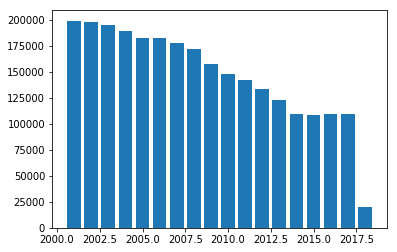

In [8]:
year_group = football_data.groupby('Year').count()
plt.bar(year_group.index, year_group['ID'])

In [9]:
football_data['Date'] = football_data['Date'].str.slice(start=0,stop=10)
football_data.shape

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(2656363, 9)

In [10]:
football_data['Date'] = pd.to_datetime(football_data['Date'])

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#football_data.groupby(['Date', football_data['Date'].dt.strftime('%W')]).count()

football_data.groupby('ID').resample('W-Mon', on='Date').count().reset_index().sort_values(by='Date')

In [ ]:
homicide_IUCR = ['0110', '0130', '0141', '0142']

iucr_filter = football_data["IUCR"].isin(homicide_IUCR)
sum(iucr_filter)

In [ ]:
homicide_dataset = football_data[iucr_filter]
homicide_dataset.head()

In [ ]:
year_group_f = homicide_dataset.groupby('Year').count()
plt.bar(year_group_f.index, year_group_f['ID'])

In [ ]:

df.groupby(df['date'].dt.week).count()